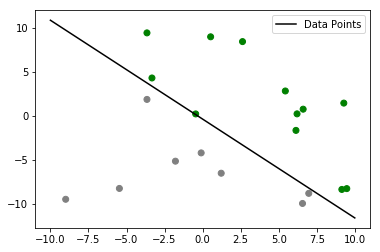

In [19]:
import matplotlib.pyplot as pyplot
import numpy as numpy

#Declaring global variables
realw = numpy.array([1, 1, 1])
start_w = numpy.array([3, -50, 0])
dimens = 2
samplecount = 20
training_data_range = 10

def plot_hypothesis(value_x, z, *var, **var2):
    x = -z[1]/z[2] if z[2] != 0 else 0
    y = -z[0]/z[2] if z[2] != 0 else 0
    value_y = x*value_x + y
    pyplot.plot(value_x, value_y, *var, **var2)

#Function for the preceptron model
def perceptron_model(start_w, train_x, train_y):
    a = start_w.copy()
    counter = 0
    while 1==1:
        d = calculate(a, train_x)
        tu = d == train_y
        if numpy.all(tu):
            return a
        else:
            c = numpy.argmax(~tu) 
            a = a + train_y[c]*train_x[:, c]
        counter += 1
    
def calculate(a, b):
    assert len(a.shape) == 1
    assert len(b.shape) == 2
    assert a.shape[0] == b.shape[0]
    x = numpy.sign(a @ b)
    return x

#Training 

train_x = numpy.vstack([
    numpy.ones(samplecount),
    numpy.random.uniform(
        -training_data_range,
        training_data_range,
        (dimens, samplecount),
    ),
])
train_y = calculate(realw, train_x)
value_x = train_x[1, :]
value_y = train_x[2, :]
colors = ['green' if y > 0 
          else 
          'grey' for y in train_y]

value_x_hypothesis = numpy.array([-training_data_range, training_data_range])
w_final = perceptron_model(start_w, train_x, train_y)
plot_hypothesis(value_x_hypothesis, w_final, 'k', label='Data Points')
pyplot.scatter(value_x, value_y, c=colors)
pyplot.legend()
pyplot.show()